In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#File paths for train and test data
train_filepath = "Resources/drugsComTrain_raw.csv"
test_filepath = "Resources/drugsComTest_raw.csv"

In [3]:
df=pd.read_csv(train_filepath)
df_test = pd.read_csv(test_filepath)

In [4]:
#combining train and test dataframes for better analysis
df = pd.concat([df,df_test])

In [5]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [6]:
df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [8]:
df.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


Here we see that the values of mean and medium are nearly equal indicating that the data is symmetrically distributed around the centre. Data follows a normal (Gaussian) distribution with a bell curve, without outliers and heavy tails.

In [9]:
df.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [10]:
df_cleaned = df.dropna()

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213869 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     213869 non-null  int64 
 1   drugName     213869 non-null  object
 2   condition    213869 non-null  object
 3   review       213869 non-null  object
 4   rating       213869 non-null  int64 
 5   date         213869 non-null  object
 6   usefulCount  213869 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [12]:
df_cleaned.isnull().any()

uniqueID       False
drugName       False
condition      False
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [13]:
!pip install wordcloud

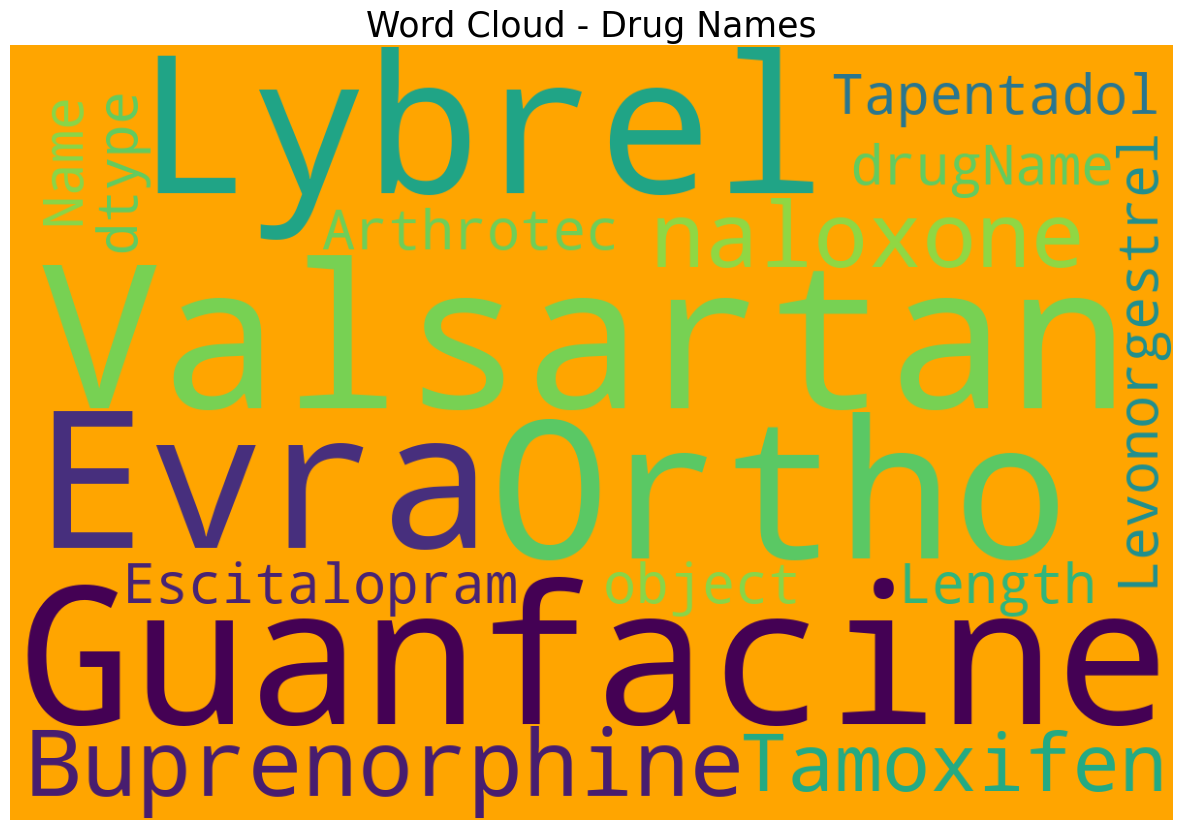

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(df_cleaned['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

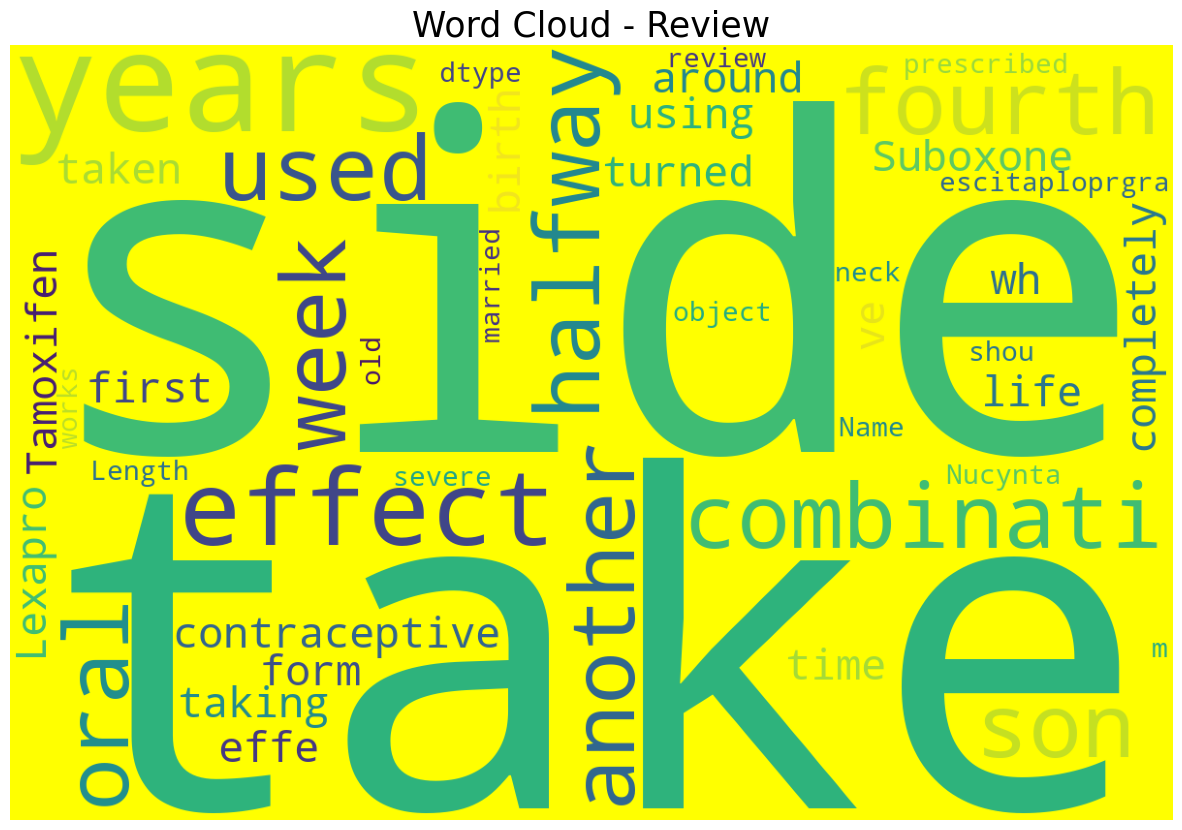

In [19]:
wordcloud = WordCloud(background_color = 'yellow', stopwords = stopwords, width = 1200, height = 800).generate(str(df_cleaned['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Review', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [25]:
!pip install word2number

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5590 sha256=2b03d61913b79e7bcb44e5e46876e1c599abbafb54f71d80c4252747097f179e
  Stored in directory: c:\users\vinaya kusuma\appdata\local\pip\cache\wheels\84\ff\26\d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [26]:
from word2number import w2n


def convert_words_to_numbers(text):
    words = text.split()
    for i, word in enumerate(words):
        try:
            words[i] = str(w2n.word_to_num(word))
        except ValueError:
            pass  # Ignore non-number words
    return ' '.join(words)

result = convert_words_to_numbers("i am checking 2 and two")
result


'i am checking 2 and 2'

In [27]:
def convert_words_to_numbers(text):
    words = text.split()
    for i, word in enumerate(words):
        try:
            words[i] = str(w2n.word_to_num(word))
        except ValueError:
            pass  # Ignore non-number words
    return ' '.join(words)

result = convert_words_to_numbers("I am checking 2 and two")
result

'I am checking 2 and 2'

In [30]:
import html
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK's punkt tokenizer data
nltk.download('punkt')

# fucntion that replaces special character codes to special characters
def clean_html_entities(sentence):
    # Use html.unescape to convert HTML-encoded entities to characters
    decoded_sentence = html.unescape(sentence)

    # Tokenize the sentence using NLTK's punkt tokenizer
    tokens = word_tokenize(decoded_sentence)

    # Filter out non-alphanumeric tokens
    alphanumeric_tokens = [token for token in tokens if token.isalnum()]

    # Join the alphanumeric tokens back into a sentence
    clean_sentence = ' '.join(alphanumeric_tokens)

    return clean_sentence

# Example usage
sentence_with_html_entities = "This is an example, with &amp; encoded &#039; in the text."
cleaned_sentence = clean_html_entities(sentence_with_html_entities)

print(f"Original Sentence: {sentence_with_html_entities}")
print(f"Cleaned Sentence: {cleaned_sentence}")


Original Sentence: This is an example, with &amp; encoded &#039; in the text.
Cleaned Sentence: This is an example with encoded in the text


[nltk_data] Downloading package punkt to C:\Users\Vinaya
[nltk_data]     Kusuma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
df_cleaned.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,condition_encoded
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,480
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,80
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,175
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,175
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,593


In [52]:
df_cleaned.set_index("uniqueID",inplace = True)

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named 'df' with columns 'drugName' and 'condition'
# Example DataFrame:
# df = pd.DataFrame({'drugName': ['DrugA', 'DrugB', 'DrugC', ...], 'condition': ['Condition1', 'Condition2', 'Condition1', ...]})

# Encode 'condition' using LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['condition_encoded'] = label_encoder.fit_transform(df_cleaned['condition'])

# Use TF-IDF vectorization for text data (assuming 'condition' is text)
tfidf_vectorizer = TfidfVectorizer()
condition_tfidf = tfidf_vectorizer.fit_transform(df_cleaned['condition'])

# Combine 'condition_encoded' with TF-IDF features
X = pd.concat([pd.DataFrame(condition_tfidf.toarray()), df_cleaned['condition_encoded']], axis=1)

# Apply k-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Optional: If you want to see the distribution of drugs in each cluster
cluster_distribution = df_cleaned.groupby('cluster')['drugName'].count().reset_index()
print(cluster_distribution)

# Optionally, inverse transform the encoded clusters back to their original labels
df_cleaned['cluster_label'] = label_encoder.inverse_transform(df_cleaned['cluster'])

# Display the resulting DataFrame with cluster assignments
print(df_cleaned[['drugName', 'condition', 'cluster_label']])


C:\Users\Vinaya Kusuma\AppData\Local\Temp\ipykernel_9240\214217864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['condition_encoded'] = label_encoder.fit_transform(df_cleaned['condition'])


TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [51]:
df_cleaned[df_cleaned.index.duplicated()]

,uniqueID,drugName,condition,review,rating,date,usefulCount,condition_encoded
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,273
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,253
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,847
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,869
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,175
...,...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43,190
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11,133
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7,175
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20,613


In [1]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Example text
text = "I really enjoyed this movie!"

# Tokenize and format the input
inputs = tokenizer(text, return_tensors='pt')

# Forward pass through the model
outputs = model(**inputs)

# Get predicted probabilities for each class using softmax
probs = softmax(outputs.logits, dim=1).detach().numpy()

# Print the predicted probabilities for each class
print("Predicted Probabilities:", probs)


C:\Users\Vinaya Kusuma\anaconda3\envs\dev\lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


C:\Users\Vinaya Kusuma\anaconda3\envs\dev\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Vinaya Kusuma\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted Probabilities: [[0.53616536 0.4638346 ]]


In [2]:
# Assuming predicted_probabilities is a list of probabilities for each sentiment class

threshold = 0.5
predicted_class = torch.argmax(probs, dim=1).item()
predicted_probability = predicted_probabilities[predicted_class]

if predicted_probability >= threshold:
    sentiment_label = "Positive"
elif predicted_probability < threshold:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"
    
print(f"Predicted Sentiment: {sentiment_label}")


TypeError: argmax(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [5]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax
import torch

def classify_sentiment(text):
    # Load pre-trained BERT model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

    # Tokenize input text and convert to tensor
    inputs = tokenizer(text, return_tensors='pt')
    
    # Forward pass through the model
    outputs = model(**inputs)

    # Get probabilities using softmax
    probs = softmax(outputs.logits, dim=1)

    # Find the predicted sentiment class
    predicted_class = torch.argmax(probs, dim=1).item()
    predicted_probability = probs.tolist()[0][predicted_class]

    # Classify based on a threshold (e.g., 0.5)
    threshold = 0.5
    if predicted_probability >= threshold:
        sentiment_label = "Positive"
    else:
        sentiment_label = "Negative"

    return sentiment_label, predicted_probability

# Example usage
text_to_analyze = "This medicine did nothing at all for my pain. Glad it works for some, but it didn't for me"
sentiment, probability = classify_sentiment(text_to_analyze)

print(f"Predicted Sentiment: {sentiment}")
print(f"Probability: {probability:.4f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted Sentiment: Positive
Probability: 0.5306


# cardiffnlp/twitter-roberta-base-sentiment-latest

In [5]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)
# text = "Covid cases are increasing fast!"
# text = "I love Aleve! It makes all my lower back pain disappear, I feel like a new person."
text = "The service was terrible. I had a bad experience."

text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)
# text = "Covid cases are increasing fast!"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)
# Print labels and scores
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


1) negative 0.9471
2) neutral 0.0459
3) positive 0.007


nlptown/bert-base-multilingual-uncased-sentiment

In [11]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load pre-trained sentiment analysis model and tokenizer
sentiment_model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
sentiment_tokenizer = BertTokenizer.from_pretrained(sentiment_model_name)
sentiment_model = BertForSequenceClassification.from_pretrained(sentiment_model_name)

# Function to predict sentiment
def predict_sentiment(text, model, tokenizer):
    tokens = tokenizer.encode_plus(
        text,
        max_length=512,
        padding="max_length",
        truncation=True,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(**tokens)
        probs = softmax(outputs.logits, dim=1)
        sentiment = torch.argmax(probs).item()
    return sentiment, probs

# Example usage
sample_review = "I really enjoyed this medication. It worked well for my condition."
sentiment, probabilities = predict_sentiment(sample_review, sentiment_model, sentiment_tokenizer)

# Print sentiment and probabilities
print("Sentiment:", sentiment)
print("Probabilities:", probabilities)


Sentiment: 4
Probabilities: tensor([[0.0013, 0.0017, 0.0350, 0.4744, 0.4877]])


In [12]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load pre-trained sentiment analysis model and tokenizer
sentiment_model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
sentiment_tokenizer = BertTokenizer.from_pretrained(sentiment_model_name)
sentiment_model = BertForSequenceClassification.from_pretrained(sentiment_model_name)

# Function to predict sentiment
def predict_sentiment(text, model, tokenizer):
    tokens = tokenizer.encode_plus(
        text,
        max_length=512,
        padding="max_length",
        truncation=True,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(**tokens)
        probs = softmax(outputs.logits, dim=1)
        sentiment = torch.argmax(probs).item()
    return sentiment, probs

# Map sentiment labels to human-readable strings
sentiment_labels = ["Very negative", "Negative", "Neutral", "Positive", "Very positive"]

# Example DataFrame
data = {
    "DrugName": ["DrugA", "DrugB", "DrugC"],
    "condition": ["ConditionA", "ConditionB", "ConditionC"],
    "review": ["Positive review.", "Neutral review.", "Negative review."],
    "rating": [5, 3, 1],
    "useful_count": [10, 5, 2]
}

df = pd.DataFrame(data)

# Perform sentiment analysis on each review in the DataFrame
df["sentiment"], df["sentiment_probs"] = zip(*df["review"].apply(lambda x: predict_sentiment(x, sentiment_model, sentiment_tokenizer)))

# Map sentiment labels to strings
df["sentiment_label"] = df["sentiment"].map(lambda x: sentiment_labels[x])

# Print the DataFrame with sentiment analysis results
print(df[["review", "sentiment_label", "sentiment_probs"]])


             review sentiment_label  \
0  Positive review.        Positive   
1   Neutral review.        Positive   
2  Negative review.   Very negative   

                                     sentiment_probs  
0  [[tensor(0.0213), tensor(0.0260), tensor(0.171...  
1  [[tensor(0.1082), tensor(0.1097), tensor(0.257...  
2  [[tensor(0.5188), tensor(0.3251), tensor(0.111...  


In [2]:
import pandas as pd
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

# Example DataFrame with a 'review' column
data = {'review': [
    "I really enjoyed this product!",
    "The service was terrible. I had a bad experience.",
    "The item arrived on time and in good condition."
]}

df = pd.DataFrame(data)

# Apply the sentiment analysis pipeline to the 'review' column
df['sentiment_prediction'] = df['review'].apply(lambda x: sentiment_pipeline(x)[0])



# Display the DataFrame with predictions
print(df[['review', 'sentiment_prediction']])


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                                              review  \
0                     I really enjoyed this product!   
1  The service was terrible. I had a bad experience.   
2    The item arrived on time and in good condition.   

                                sentiment_prediction  
0  {'label': 'positive', 'score': 0.9852980375289...  
1  {'label': 'negative', 'score': 0.9470845460891...  
2  {'label': 'positive', 'score': 0.910353422164917}  


In [3]:
df["sentiment_prediction"].dtypes

dtype('O')